# Data Introduction

In [1]:
import pandas as pd

In [2]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')
wine = red.append(white)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Understand the Features

###### fixed acidity:  Non-volatile acids that do not evaporate readily.
###### volatile acidity:  High acetic acid in the wine which leads to an unpleasant vinegar taste.
###### citric acid:  Preservative to increase acidity.
###### residual sugar:  Amount Sugar remaining after fermentation stops.
###### chlorides:  Amount of salt in the wine.
###### free sulfur dioxide:  Prevents microbial growth and the oxidation of wine.
###### total sulfur dioxide:  Amount of free bound forms of SO2.
###### density:  Sweeter wines have a higher density.
###### pH:  Level of acidity.
###### sulphates:  Wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant.
###### alcohol:  Amount of alcohol in the wine.
###### quality: The target variable (what we’re trying to predict), which ranges from 3 to 9.

In [4]:
wine.shape

(6497, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [6]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']

# Split the Data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 42)

# Select and Train the Model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
model.fit(x_train, y_train)

LogisticRegression()

# Evaluate the Model

In [11]:
prediction = model.predict(x_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.46      0.48      0.47       402
           6       0.48      0.71      0.58       597
           7       0.25      0.00      0.01       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.48      1300
   macro avg       0.31      0.19      0.19      1300
weighted avg       0.41      0.48      0.41      1300



# Target Imbalance

In [13]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

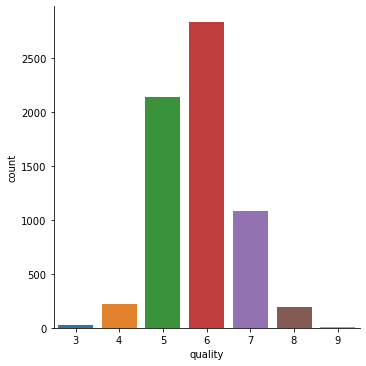

In [15]:
sns.catplot(x = 'quality', data = wine, kind = 'count')

In [16]:
wine['quality'] = wine['quality'].apply(lambda x: 0 if x < 7 else 1)

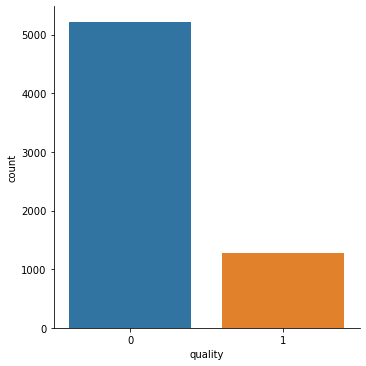

In [17]:
sns.catplot(x = 'quality', data = wine, kind = 'count')

In [18]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1048
           1       0.59      0.23      0.33       252

    accuracy                           0.82      1300
   macro avg       0.71      0.59      0.61      1300
weighted avg       0.79      0.82      0.79      1300



# Correlation Matrix for Feature Selection

<AxesSubplot:>

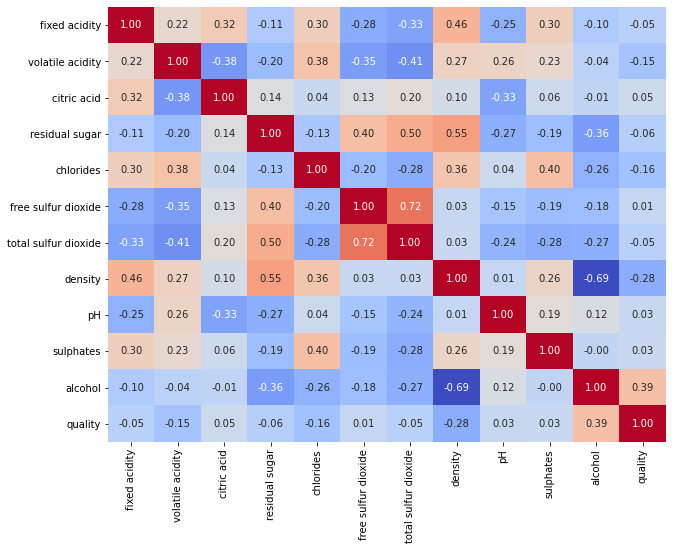

In [19]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

### Free Sulfur Dioxide or Total Sulfur Dioxide?

In [20]:
wine = wine.drop(['total sulfur dioxide'], axis =1)

<AxesSubplot:>

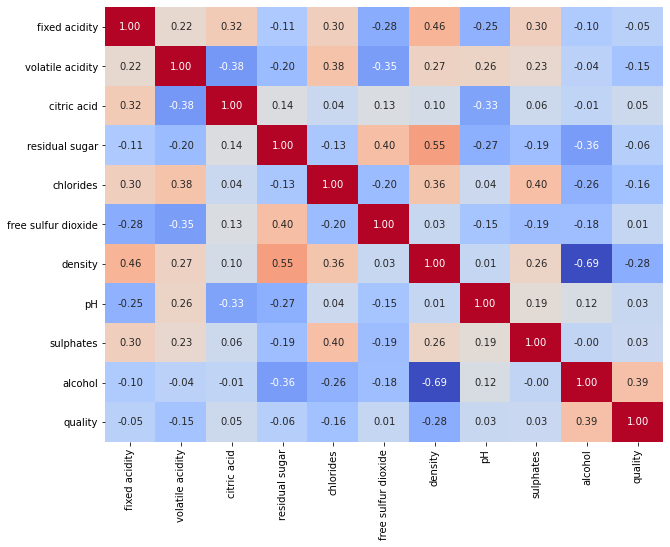

In [21]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

### Density or Alcohol?

In [22]:
wine = wine.drop(['density'], axis =1)

<AxesSubplot:>

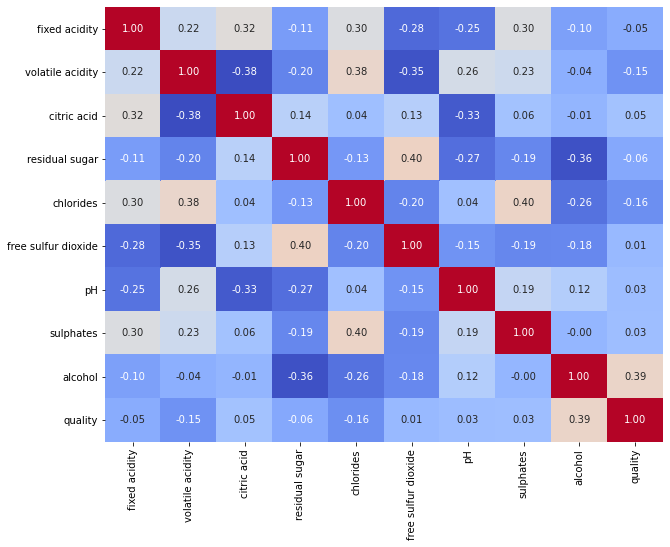

In [23]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

### Everything below 0.05

In [24]:
wine = wine.drop(['residual sugar', 'pH', 'sulphates'], axis =1)

<AxesSubplot:>

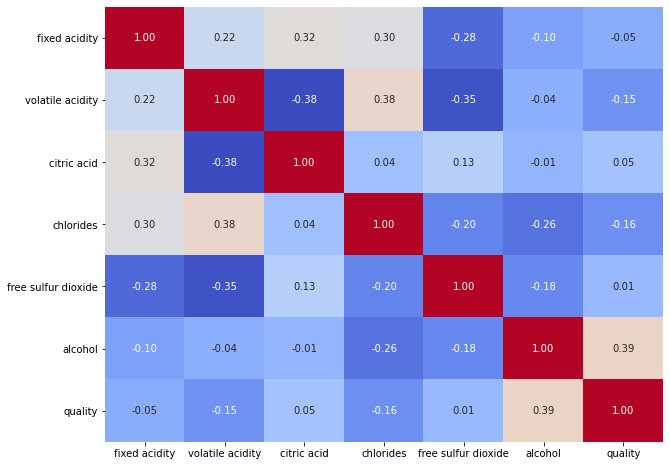

In [25]:
plt.figure(figsize = (10, 8))
sns.heatmap(wine.corr(), annot = True, cbar = False, fmt = '.2f', cmap = 'coolwarm')

In [26]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1048
           1       0.59      0.24      0.34       252

    accuracy                           0.82      1300
   macro avg       0.71      0.60      0.62      1300
weighted avg       0.79      0.82      0.79      1300



### Boxplots to Identify Outliers

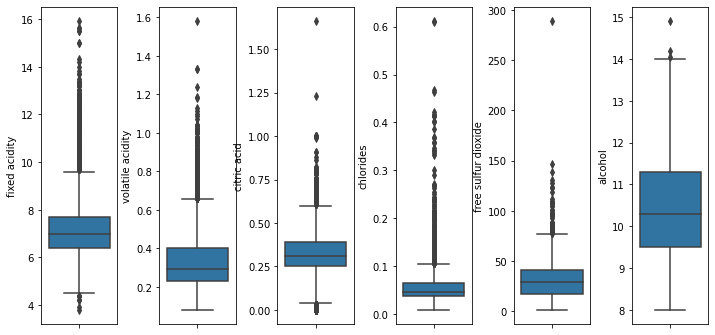

In [27]:
rows = 1
cols = 6
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 5))
axes = axes.flatten()
fig.tight_layout()
for ax, column in zip(axes, wine.iloc[:,:-1]):
    sns.boxplot(y = wine[column], ax = ax)

### Distplots to Observe Skewness

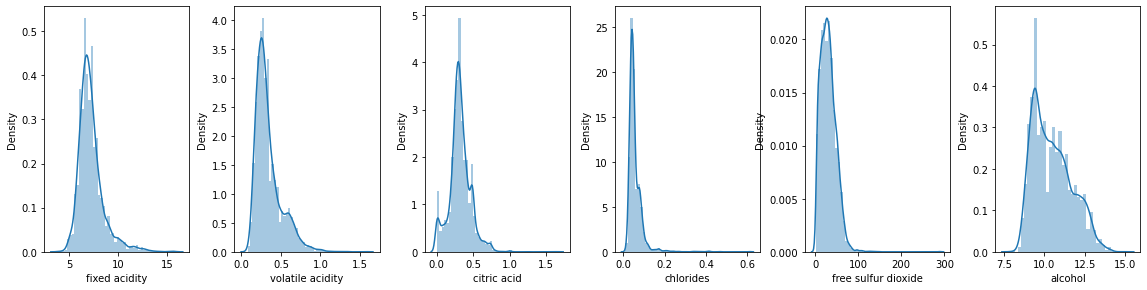

In [28]:
rows = 1
cols = 6
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 4))
axes = axes.flatten()
fig.tight_layout()
for ax, column in zip(axes, wine.iloc[:,:-1]):
    sns.distplot(wine[column], kde = True, ax = ax)

###### fixed acidity = 78%
###### volatile acidity = 80%
###### citric acid = 77%
###### chlorides = 77%
###### free sulfur dioxide = 76%
###### alcohol = 78%

In [29]:
column_name = 'volatile acidity'

In [30]:
lower = wine[column_name].quantile(0.05)
upper = wine[column_name].quantile(0.95)
print('Lower = ', lower)
print('Upper = ', upper)

Lower =  0.16
Upper =  0.67


In [31]:
count1 = wine[(wine[column_name] < lower) | (wine[column_name] > upper)].count()
count2 = wine.count()
print('This will delete', count1[0], 'rows, or about', format((count1[0] * 100)/ count2[0], '.2f'), '% of the data.')

This will delete 588 rows, or about 9.05 % of the data.


In [32]:
wine = wine.drop(wine[wine[column_name] < lower].index)
wine = wine.drop(wine[wine[column_name] > upper].index)

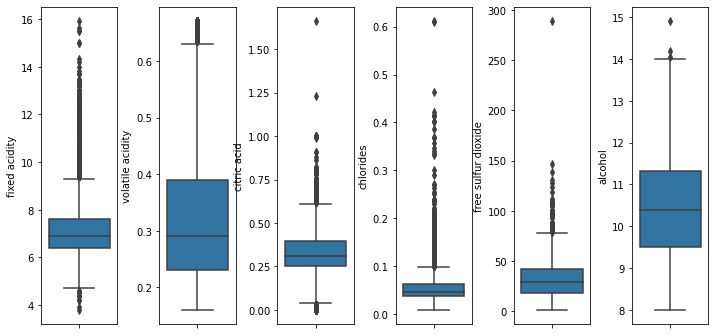

In [33]:
rows = 1
cols = 6
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (10, 5))
axes = axes.flatten()
fig.tight_layout()
for ax, column in zip(axes, wine.iloc[:,:-1]):
    sns.boxplot(y = wine[column], ax = ax)

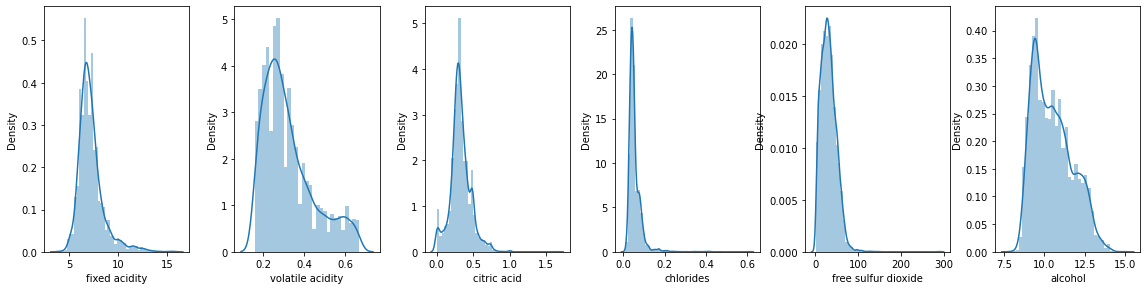

In [34]:
rows = 1
cols = 6
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 4))
axes = axes.flatten()
fig.tight_layout()
for ax, column in zip(axes, wine.iloc[:,:-1]):
    sns.distplot(wine[column], kde = True, ax = ax)

In [35]:
features = wine.drop(['quality'], axis = 1)
targets = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.80, random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       904
           1       0.66      0.25      0.36       211

    accuracy                           0.83      1115
   macro avg       0.75      0.61      0.63      1115
weighted avg       0.81      0.83      0.80      1115



# Save the Model

In [36]:
import pickle

In [37]:
with open('WineQuality.pk', 'wb') as file:
    pickle.dump(model, file)